In [133]:
import pandas as pd
import matplotlib.pyplot as plt

### Data & EDA: 

In [134]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [135]:
print(df_train.head())

                                  attack_description mitre_technique
0  Adversaries may modify code signing policies t...           T1553
1  Adversaries may gather information about the v...           T1591
2  Adversaries may register for web services that...           T1583
3  Adversaries may establish persistence and elev...           T1546
4  Adversaries may inject malicious code into pro...           T1055


In [136]:
print("shape : ",df_train.shape)
print(df_train.describe())

shape :  (291, 2)
                                       attack_description mitre_technique
count                                                 291             291
unique                                                291              45
top     Adversaries may modify code signing policies t...           T1546
freq                                                    1              15


##### Observation 1:

 - There are total 45 unique mitre_technique are given in training data set.
 - There are no duplicate attack reported in attack_description.
 - There are no null attack_description.

Number of mitre_technique in training data set :  45


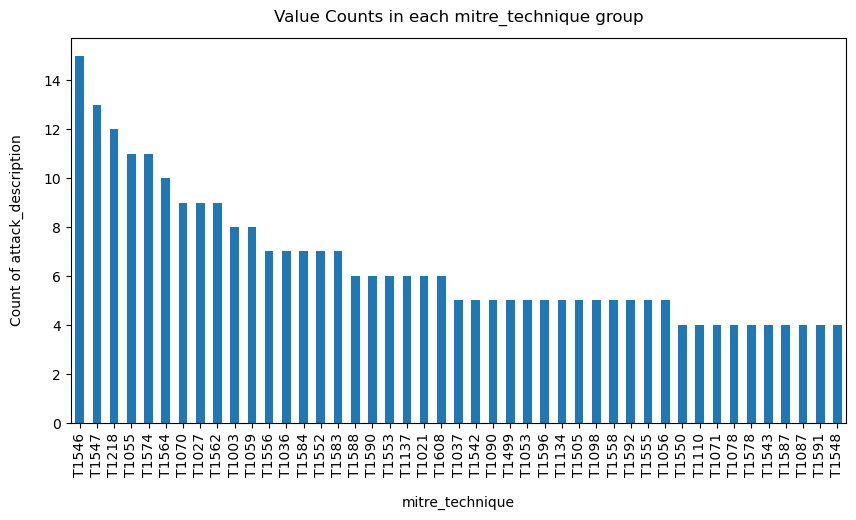

In [137]:
print("Number of mitre_technique in training data set : ", len(df_train['mitre_technique'].value_counts()))
df_train['mitre_technique'].value_counts(normalize = False).plot(kind='bar', figsize=(10, 5))
plt.xlabel("mitre_technique", labelpad=14)
plt.ylabel("Count of attack_description", labelpad=14)
plt.title("Value Counts in each mitre_technique group", y=1.02);

##### Observation 2:
 -  Data is almost equally distributed. We have enough evidence from each mitre_technique group / class.
 -  As we have just 291 records we shouls try ML algorithms for DL algorithms this data is not enough.

## Text Preprocessing:
 - Remove all special characters
 - Lowercase all the words
 - Tokenize
 - Remove stopwords
 - Lemmatize

In [138]:
import nltk
# nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [139]:
lemmatizer = WordNetLemmatizer()
def preprocessing(txt):
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = txt.lower()
    txt = txt.split()
    txt = [word for word in txt if word not in stopwords.words('english')]
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = ' '.join(txt)
    return txt

In [140]:
print(df_train['attack_description'][0])
print()
preprocessing(df_train['attack_description'][0])

Adversaries may modify code signing policies to enable execution of unsigned or self-signed code. Code signing provides a level of authenticity on a program from a developer and a guarantee that the program has not been tampered with. Security controls can include enforcement mechanisms to ensure that only valid, signed code can be run on an operating system.



'adversary may modify code signing policy enable execution unsigned self signed code code signing provides level authenticity program developer guarantee program tampered security control include enforcement mechanism ensure valid signed code run operating system'

In [141]:
df_train['attack_description_clean'] = df_train['attack_description'].apply(preprocessing)
df_test['attack_description_clean'] = df_test['attack_description'].apply(preprocessing)

In [142]:
df_train.head()

,attack_description,mitre_technique,attack_description_clean
0,Adversaries may modify code signing policies t...,T1553,adversary may modify code signing policy enabl...
1,Adversaries may gather information about the v...,T1591,adversary may gather information victim busine...
2,Adversaries may register for web services that...,T1583,adversary may register web service used target...
3,Adversaries may establish persistence and elev...,T1546,adversary may establish persistence elevate pr...
4,Adversaries may inject malicious code into pro...,T1055,adversary may inject malicious code process vi...


### Word embedding

- There many words embedding technique such as countvectorizer, TF-IDF, Word2Vec, GloVe and BERT etc.
 - Lets start from countvectorizer and see the results. If it won't work then will try some other technique.

In [149]:
X_train = df_train['attack_description_clean']
y_train = df_train['mitre_technique']
X_test = df_test['attack_description_clean']
y_test = df_test['mitre_technique']

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(291, 1912)

### Modeling
-  There are many classification algorithms such as Logistic Regression, Naive Bayes, K-Nearest Neighbour, Decision Tree, random forest, and Support Vector Machines etc.
 will start from Logistic Regression and see.
 - If we will stuck in accuracy then will try other model, grid search for parameter search, hyper parameter tuning.
 - If our model suffer from Over fitting (if model good on training data set and not good on test data set) then will try technique such as K_fold cross validation, model with regularization etc. 

 

In [158]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clf = lr.fit(X_train_cv, y_train)
y_train_pred = clf.predict(X_train_cv)

In [160]:
X_test_cv = cv.transform(X_test)
y_test_pred = clf.predict(X_test_cv)

In [164]:
from sklearn.metrics import classification_report, accuracy_score
print('Train accuracy :', accuracy_score(y_train, y_train_pred))
print('Test accuracy :', accuracy_score(y_test, y_test_pred))
print("classification_report on Test data set : ")
print(classification_report(y_test , y_test_pred))

Train accuracy : 1.0
Test accuracy : 1.0
classification_report on Test data set : 
              precision    recall  f1-score   support

       T1003       1.00      1.00      1.00         1
       T1021       1.00      1.00      1.00         1
       T1027       1.00      1.00      1.00         1
       T1036       1.00      1.00      1.00         1
       T1037       1.00      1.00      1.00         1
       T1053       1.00      1.00      1.00         1
       T1055       1.00      1.00      1.00         2
       T1056       1.00      1.00      1.00         1
       T1059       1.00      1.00      1.00         1
       T1070       1.00      1.00      1.00         1
       T1071       1.00      1.00      1.00         1
       T1090       1.00      1.00      1.00         1
       T1098       1.00      1.00      1.00         1
       T1110       1.00      1.00      1.00         1
       T1134       1.00      1.00      1.00         1
       T1137       1.00      1.00      1.00         

##### Observation 3:
 - As we can see our accuracy is not degrading on test data set so our assumption is that out model is not overfit. Aslo we are getting good accuracy so out model is not under fit.
 - As precision recall and F1-score is good so we won’t go for other technique such as grid search for parameter search, hyper parameter tuning.
 - As we are getting good accuracy on logistic regression itself we won’t go for other algorithms.


##### Save model as results

In [179]:
import pickle
df_test['mitre_technique_pred'] = y_test_pred
df_test = df_test[['attack_description' , 'mitre_technique' ,'mitre_technique_pred' ]]
df_test.to_csv("test.csv", index = False)
pickle.dump(clf, open("lr_clf.sav", 'wb'))
pickle.dump(cv, open("cv.sav", 'wb'))